# In this notebook:
1. Calibrating the model parametes for each season in California

In [1]:
path_dir = "pycharm"
import os
os.chdir(path_dir)
import TAMU_model as model
os.chdir('../')
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from importlib import reload
from scipy import optimize
from matplotlib.ticker import FuncFormatter

In [2]:
model.varphi

14

# Calibration Func

In [3]:
def errorfunc(tpl,dates,data,state,season):
    # setting parameters
    beta = np.array([tpl[0],tpl[1],tpl[1],tpl[2],tpl[3]])
    phi = np.array([tpl[4]]) if tpl[4] > 1 else np.array([tpl[4] * 10**(4)])
    
    # Run model with given parameters
    model_result =  model.run_model(beta,phi,1e-4,1e-4,population_size=model.population_size[state],
                vaccination_coverage=model.vaccination_coverage['US'])
    
    # Resample the model's result by week
    model_result_weekly = model.model_infected_symp_cases(model_result,dates,season)
    
    # Calculated total symptomatic (high+low) per age group (adding as columns)
    for i,age_group in [(0,[0,5]),(1,[1,6]),(2,[2,7]),(3,[3,8]),(4,[4,9])]:
        model_result_weekly[model.A[i]+'_mdl'] = model_result_weekly.values[:,age_group].sum(axis=1)
    print("Current MSE: ", model.MSE(data,model_result_weekly))
    return np.log(model.MSE(data,model_result_weekly))

def print_stat_fit(fit_results_object):
    """The function gets optimization results object and print additional info about the optimization"""
    print('minimized value:',fit_results_object.fun)
    print('fitted parameters: Beta={0}, Phi={1}'.format(fit_results_object.x[:4],fit_results_object.x[-1] * 10 ** (4)))
    print('num of sampling the target function:',fit_results_object.nfev)

## Model reload

In [4]:
os.chdir(path_dir)
model = reload(model)
os.chdir('../')

# Model Calibration

## Loading data

In [5]:
#  getting season dates:
dates_19 = model.get_date_from_week(40,2018)
dates_18 = model.get_date_from_week(40,2017)
dates_17 = model.get_date_from_week(40,2016)
dates_16 = model.get_date_from_week(39,2015)
dates_15 = model.get_date_from_week(39,2014)

In [6]:
new_dates = []
for date in dates_16:
    if date.week == 53:
        continue
    else:
        new_dates.append(date)
dates_16 = new_dates

In [7]:
# loading seasonal data:
ca_data = model.get_state_data('California')
ca_19 = model.data_with_dates(ca_data[2019],dates_19)
ca_18 = model.data_with_dates(ca_data[2018],dates_18)
ca_17 = model.data_with_dates(ca_data[2017],dates_17)
ca_16 = model.data_with_dates(ca_data[2016],dates_16)
ca_15 = model.data_with_dates(ca_data[2015],dates_15)

## Manual calibration

MSE: 3.7699946964246256e-07


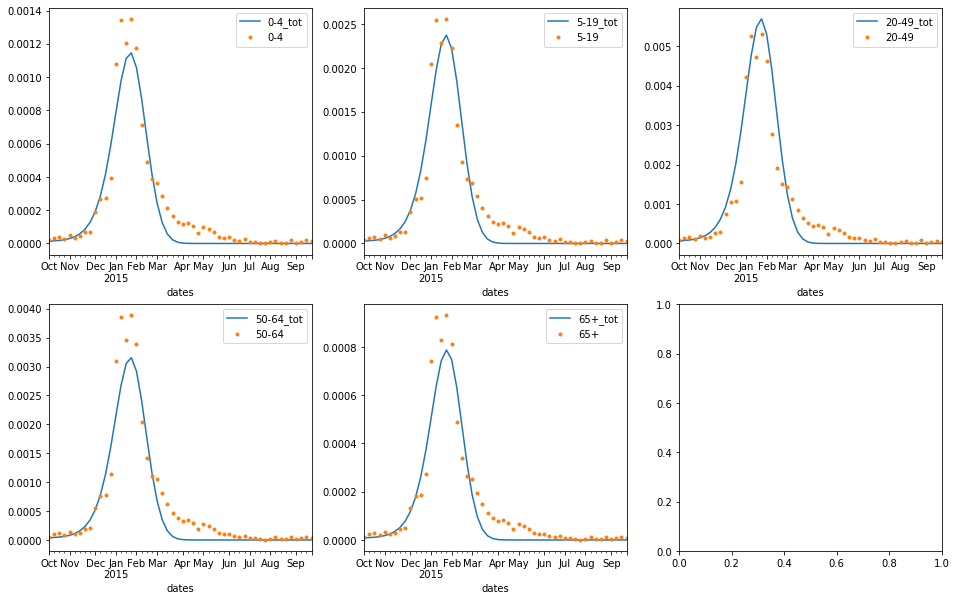

In [8]:
res_mdl = model.run_model([0.0027]+[0.001682]*2+[0.0026,0.0019],0.080*10**(4),1e-4,1e-4,
                          population_size=model.population_size['California'],
                vaccination_coverage=model.vaccination_coverage['US'])




# plotting the data and model
calibrate_mdl_15 = model.model_infected_symp_cases(res_mdl,dates_15,2015)
model.plot_calibrated_model(ca_15,calibrate_mdl_15)

## Calibration by season

### 2015

Current MSE:  5.107907087836443e-06
Current MSE:  5.107907087836443e-06
Current MSE:  5.107907066629206e-06
Current MSE:  5.1079067864290236e-06
Current MSE:  5.107907023544797e-06
Current MSE:  5.107907078364999e-06
Current MSE:  5.1079070978660874e-06
Current MSE:  5.107907029917441e-06
Current MSE:  5.107907029917441e-06
Current MSE:  5.1079070087099e-06
Current MSE:  5.107906728505638e-06
Current MSE:  5.107906965624878e-06
Current MSE:  5.107907020445862e-06
Current MSE:  5.107907039947237e-06
Current MSE:  0.000672385697453035
Current MSE:  0.000672385697453035
Current MSE:  0.0006723857022093113
Current MSE:  0.0006723856326280174
Current MSE:  0.0006723857215888327
Current MSE:  0.0006723857029465362
Current MSE:  0.0006723893535341743
Current MSE:  0.0005175655362528082
Current MSE:  0.0005175655362528082
Current MSE:  0.0005175655716968158
Current MSE:  0.0005175660564870479
Current MSE:  0.0005175656666844903
Current MSE:  0.0005175655560293905
Current MSE:  0.00051755758406

Current MSE:  5.0903882692720205e-06
Current MSE:  5.09038480946129e-06
Current MSE:  5.0903839765678576e-06
Current MSE:  5.090384015470426e-06
Current MSE:  5.084926671752242e-06
Current MSE:  5.084926671752242e-06
Current MSE:  5.084926788462586e-06
Current MSE:  5.084928494632257e-06
Current MSE:  5.084927136705684e-06
Current MSE:  5.084926737542961e-06
Current MSE:  5.084926823857751e-06
Current MSE:  5.085064457253959e-06
Current MSE:  5.085064457253959e-06
Current MSE:  5.085064549298898e-06
Current MSE:  5.085065908310166e-06
Current MSE:  5.085064860936557e-06
Current MSE:  5.0850645138037895e-06
Current MSE:  5.085064602338521e-06
Current MSE:  5.08485490256411e-06
Current MSE:  5.08485490256411e-06
Current MSE:  5.084855003485219e-06
Current MSE:  5.084856486408958e-06
Current MSE:  5.084855324553079e-06
Current MSE:  5.084854961938763e-06
Current MSE:  5.0848550506304996e-06
Current MSE:  5.084854902297132e-06
Current MSE:  5.084854902297132e-06
Current MSE:  5.08485500321

Current MSE:  4.814586877815657e-06
Current MSE:  4.814586877815657e-06
Current MSE:  4.8145891412096465e-06
Current MSE:  4.814629078284351e-06
Current MSE:  4.814591930288741e-06
Current MSE:  4.814587527528283e-06
Current MSE:  4.814587395599071e-06
Current MSE:  3.965699482389414e-06
Current MSE:  3.965699482389414e-06
Current MSE:  3.965702672691656e-06
Current MSE:  3.9657696783627585e-06
Current MSE:  3.96570690769044e-06
Current MSE:  3.965700513438514e-06
Current MSE:  3.965706952881161e-06
Current MSE:  3.9656840264067015e-06
Current MSE:  3.9656840264067015e-06
Current MSE:  3.965687216455778e-06
Current MSE:  3.965754217096439e-06
Current MSE:  3.965691451006975e-06
Current MSE:  3.965685057369562e-06
Current MSE:  3.9656914969676806e-06
Current MSE:  3.96569947757453e-06
Current MSE:  3.96569947757453e-06
Current MSE:  3.96570266787676e-06
Current MSE:  3.9657696735477895e-06
Current MSE:  3.965706902875559e-06
Current MSE:  3.965700508623636e-06
Current MSE:  3.9657069480

Current MSE:  6.440810649400023e-07
Current MSE:  6.440712895141707e-07
Current MSE:  6.440693334223885e-07
Current MSE:  6.440641933635234e-07
Current MSE:  5.506774613347818e-07
Current MSE:  5.506774613347818e-07
Current MSE:  5.506784971527788e-07
Current MSE:  5.506842564617754e-07
Current MSE:  5.506753992436491e-07
Current MSE:  5.506768182554281e-07
Current MSE:  5.506759295612719e-07
Current MSE:  5.394408547560136e-07
Current MSE:  5.394408547560136e-07
Current MSE:  5.394422173240981e-07
Current MSE:  5.394420002317367e-07
Current MSE:  5.394390104944136e-07
Current MSE:  5.39440091174955e-07
Current MSE:  5.394376184669736e-07
Current MSE:  5.394408338707133e-07
Current MSE:  5.394408338707133e-07
Current MSE:  5.394421964391902e-07
Current MSE:  5.394419793504635e-07
Current MSE:  5.394389896099118e-07
Current MSE:  5.394400702897927e-07
Current MSE:  5.394375975816209e-07
Current MSE:  5.39440552037741e-07
Current MSE:  5.39440552037741e-07
Current MSE:  5.394419146045628

Current MSE:  2.8735546195672647e-07
Current MSE:  2.8735546195672647e-07
Current MSE:  2.8735546554602805e-07
Current MSE:  2.8735490683286563e-07
Current MSE:  2.873553643843936e-07
Current MSE:  2.8735536172627337e-07
Current MSE:  2.873555761490132e-07
Current MSE:  2.866756037181362e-07
Current MSE:  2.866756037181362e-07
Current MSE:  2.866756056972647e-07
Current MSE:  2.866748778403381e-07
Current MSE:  2.866754545777366e-07
Current MSE:  2.866755425775454e-07
Current MSE:  2.8667567130067286e-07
Current MSE:  2.865590669170501e-07
Current MSE:  2.865590669170501e-07
Current MSE:  2.865590717771185e-07
Current MSE:  2.865583039311683e-07
Current MSE:  2.865589026634829e-07
Current MSE:  2.865590272226222e-07
Current MSE:  2.865591098816502e-07
Current MSE:  2.865590669138814e-07
Current MSE:  2.865590669138814e-07
Current MSE:  2.865590717739504e-07
Current MSE:  2.865583039280126e-07
Current MSE:  2.8655890266031685e-07
Current MSE:  2.865590272194544e-07
Current MSE:  2.86559

Current MSE:  2.86080274441075e-07
Current MSE:  2.8608028832286616e-07
Current MSE:  2.8608041040914866e-07
Current MSE:  2.8608030291526713e-07
Current MSE:  2.860802810121152e-07
Current MSE:  2.8608028162092353e-07
Current MSE:  2.8607604948993666e-07
Current MSE:  2.8607604948993666e-07
Current MSE:  2.860760497178845e-07
Current MSE:  2.8607605169311647e-07
Current MSE:  2.8607604946440137e-07
Current MSE:  2.8607604914666835e-07
Current MSE:  2.860760500845427e-07
Current MSE:  2.860760533115537e-07
Current MSE:  2.860760533115537e-07
Current MSE:  2.8607605304094203e-07
Current MSE:  2.860760485630852e-07
Current MSE:  2.860760517796149e-07
Current MSE:  2.860760527246965e-07
Current MSE:  2.860760540670673e-07
Current MSE:  2.8607604958299355e-07
Current MSE:  2.8607604958299355e-07
Current MSE:  2.8607604981118624e-07
Current MSE:  2.860760517862746e-07
Current MSE:  2.8607604956054326e-07
Current MSE:  2.86076049240205e-07
Current MSE:  2.860760501764714e-07
Current MSE:  2.

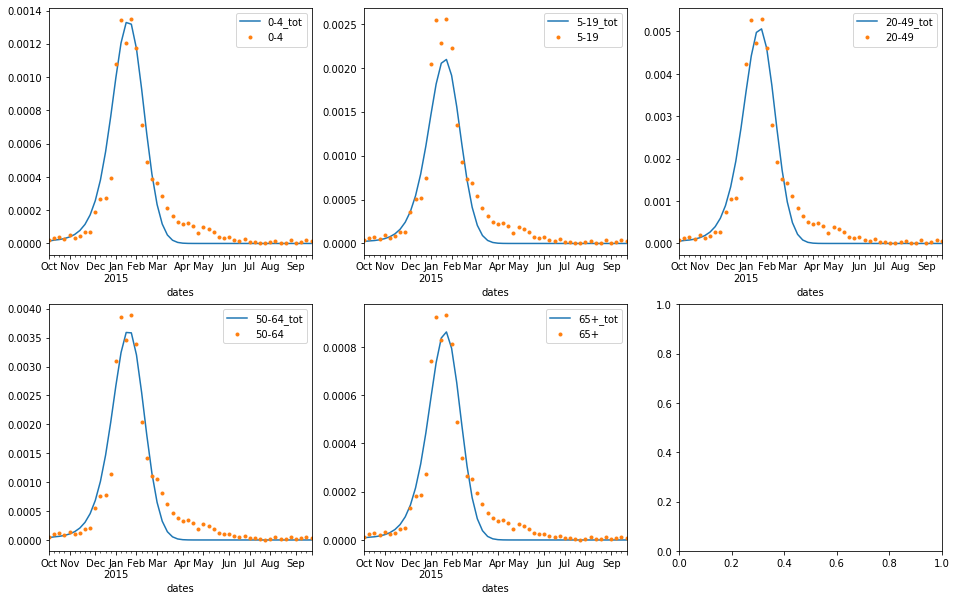

In [9]:
#fitting season 2015:
# Model Fitting
p0=(0.0027,0.001682,0.0026,0.0019,0.080) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.003,0.017))# boundries for variables
res_fit_15= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=( dates_15,ca_15,'California',2015)
                           ,options={'maxiter':1000})

fitted_params_15 = res_fit_15.x

# run the fitted model:
fitted_beta_15 = np.array([fitted_params_15[0],fitted_params_15[1],fitted_params_15[1],fitted_params_15[2],
                           fitted_params_15[3]])
fitted_phi_15 = fitted_params_15[4]
res_mdl_15 = model.run_model(fitted_beta_15,fitted_phi_15*10**(4),1e-4,1e-4,
                          population_size=model.population_size['California'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_15)
calibrate_mdl_15 = model.model_infected_symp_cases(res_mdl_15,dates_15,2015)
model.plot_calibrated_model(ca_15,calibrate_mdl_15)

### 2016

Current MSE:  1.3164806897393964e-06
Current MSE:  1.3164806897393964e-06
Current MSE:  1.3164806836666365e-06
Current MSE:  1.3164806036079218e-06
Current MSE:  1.31648067181713e-06
Current MSE:  1.3164806871418045e-06
Current MSE:  1.3164806960864955e-06
Current MSE:  1.3164806714145272e-06
Current MSE:  1.3164806714145272e-06
Current MSE:  1.3164806653416953e-06
Current MSE:  1.3164805852820154e-06
Current MSE:  1.3164806534920495e-06
Current MSE:  1.316480668816905e-06
Current MSE:  1.3164806777617157e-06
Current MSE:  0.0005172294805307101
Current MSE:  0.0005172294805307101
Current MSE:  0.0005172294801863565
Current MSE:  0.0005172293262804625
Current MSE:  0.0005172294974435829
Current MSE:  0.0005172294835183169
Current MSE:  0.0005172365362181004
Current MSE:  0.0005576054706869328
Current MSE:  0.0005576054706869328
Current MSE:  0.0005576054637556117
Current MSE:  0.0005576050923095904
Current MSE:  0.0005576054734257256
Current MSE:  0.0005576054733652297
Current MSE:  0.0

Current MSE:  1.3069986406004929e-06
Current MSE:  1.3069986982996342e-06
Current MSE:  1.3069995488543776e-06
Current MSE:  1.306998759990872e-06
Current MSE:  1.3069986587175895e-06
Current MSE:  1.306998748237024e-06
Current MSE:  1.304391343423521e-06
Current MSE:  1.304391343423521e-06
Current MSE:  1.3043916946633222e-06
Current MSE:  1.3043968644940792e-06
Current MSE:  1.3043920493657738e-06
Current MSE:  1.304391444996789e-06
Current MSE:  1.3043913408237394e-06
Current MSE:  1.3035524697368574e-06
Current MSE:  1.3035524697368574e-06
Current MSE:  1.303552573622077e-06
Current MSE:  1.3035541069800873e-06
Current MSE:  1.3035526780376766e-06
Current MSE:  1.3035525008863261e-06
Current MSE:  1.3035526046838285e-06
Current MSE:  1.302508946108781e-06
Current MSE:  1.302508946108781e-06
Current MSE:  1.302509123088833e-06
Current MSE:  1.3025117321538297e-06
Current MSE:  1.3025093012168976e-06
Current MSE:  1.3025089982201852e-06
Current MSE:  1.3025090664241465e-06
Current MS

Current MSE:  1.2752089549114205e-06
Current MSE:  1.2752089549114205e-06
Current MSE:  1.275209754146556e-06
Current MSE:  1.2752214441845134e-06
Current MSE:  1.275210571623832e-06
Current MSE:  1.2752091925857076e-06
Current MSE:  1.275208663779643e-06
Current MSE:  1.1222019596722827e-06
Current MSE:  1.1222019596722827e-06
Current MSE:  1.1222054367798165e-06
Current MSE:  1.1222578938356618e-06
Current MSE:  1.1222092264724799e-06
Current MSE:  1.1222030550966388e-06
Current MSE:  1.122200806532375e-06
Current MSE:  1.2774246600888448e-06
Current MSE:  1.2774246600888448e-06
Current MSE:  1.2774246084039578e-06
Current MSE:  1.2774241355442443e-06
Current MSE:  1.2774244582665986e-06
Current MSE:  1.2774246416072817e-06
Current MSE:  1.2774242220507767e-06
Current MSE:  6.097400961139884e-07
Current MSE:  6.097400961139884e-07
Current MSE:  6.097413837327996e-07
Current MSE:  6.097660381973351e-07
Current MSE:  6.097421783084789e-07
Current MSE:  6.097405661065095e-07
Current MSE

Current MSE:  4.266460873656553e-08
Current MSE:  4.266250461735166e-08
Current MSE:  4.2661580603706375e-08
Current MSE:  4.266220362475962e-08
Current MSE:  4.266220362475962e-08
Current MSE:  4.2662623991395835e-08
Current MSE:  4.2672281879783364e-08
Current MSE:  4.266460915595708e-08
Current MSE:  4.2662505036785894e-08
Current MSE:  4.266158102317422e-08
Current MSE:  3.2982631542155677e-08
Current MSE:  3.2982631542155677e-08
Current MSE:  3.298302878744035e-08
Current MSE:  3.298851717144395e-08
Current MSE:  3.298394928105064e-08
Current MSE:  3.298294436062878e-08
Current MSE:  3.2982139680911554e-08
Current MSE:  3.246954993532404e-08
Current MSE:  3.246954993532404e-08
Current MSE:  3.246968190615109e-08
Current MSE:  3.247318453207195e-08
Current MSE:  3.247040950151491e-08
Current MSE:  3.2469696718984384e-08
Current MSE:  3.2469249572019965e-08
Current MSE:  3.135173296720431e-08
Current MSE:  3.135173296720431e-08
Current MSE:  3.135191398394451e-08
Current MSE:  3.135

Current MSE:  2.836632227409529e-08
Current MSE:  2.8366279008598212e-08
Current MSE:  2.8339278102671764e-08
Current MSE:  2.8339278102671764e-08
Current MSE:  2.833932308957641e-08
Current MSE:  2.83397015991628e-08
Current MSE:  2.8339405568293472e-08
Current MSE:  2.8339302673285926e-08
Current MSE:  2.8339259597008124e-08
Current MSE:  2.833927810062982e-08
Current MSE:  2.833927810062982e-08
Current MSE:  2.8339323087530224e-08
Current MSE:  2.833970159706528e-08
Current MSE:  2.833940556623891e-08
Current MSE:  2.8339302671241748e-08
Current MSE:  2.833925959497019e-08
Current MSE:  2.8339278102246296e-08
Current MSE:  2.8339278102246296e-08
Current MSE:  2.833932308915093e-08
Current MSE:  2.833970159873593e-08
Current MSE:  2.8339405567867395e-08
Current MSE:  2.8339302672860345e-08
Current MSE:  2.833925959658273e-08
Current MSE:  2.831606328810975e-08
Current MSE:  2.831606328810975e-08
Current MSE:  2.8316063326786205e-08
Current MSE:  2.8315894076679235e-08
Current MSE:  2

Current MSE:  2.8239861046753048e-08
Current MSE:  2.8239870046754685e-08
Current MSE:  2.8239966260896533e-08
Current MSE:  2.8239893655861653e-08
Current MSE:  2.8239863991426322e-08
Current MSE:  2.823985306337809e-08
Current MSE:  2.8239861046647218e-08
Current MSE:  2.8239861046647218e-08
Current MSE:  2.8239870046648114e-08
Current MSE:  2.823996626078125e-08
Current MSE:  2.823989365575376e-08
Current MSE:  2.8239863991320132e-08
Current MSE:  2.8239853063272864e-08
Current MSE:  2.8239960434152104e-08
Current MSE:  2.8239960434152104e-08
Current MSE:  2.8239952343935572e-08
Current MSE:  2.8239850901788203e-08
Current MSE:  2.8239944378775196e-08
Current MSE:  2.8239955418514948e-08
Current MSE:  2.8239970447541535e-08
Current MSE:  2.8239362628670817e-08
Current MSE:  2.8239362628670817e-08
Current MSE:  2.8239363066499857e-08
Current MSE:  2.8239360314503033e-08
Current MSE:  2.8239370872033225e-08
Current MSE:  2.8239361587045745e-08
Current MSE:  2.823936365322455e-08
Curre

Current MSE:  2.823933131379361e-08
Current MSE:  2.8239314770009032e-08
Current MSE:  2.8239299021248286e-08
Current MSE:  2.8239295390487093e-08
Current MSE:  2.823929821742862e-08
Current MSE:  2.823929821742862e-08
Current MSE:  2.8239301955470488e-08
Current MSE:  2.8239331284305188e-08
Current MSE:  2.8239314748450392e-08
Current MSE:  2.8239299001623565e-08
Current MSE:  2.8239295371650122e-08
Current MSE:  2.8239298236721494e-08
Current MSE:  2.8239298236721494e-08
Current MSE:  2.823930197549098e-08
Current MSE:  2.8239331313786947e-08
Current MSE:  2.823931477000227e-08
Current MSE:  2.8239299021241675e-08
Current MSE:  2.823929539048042e-08
Current MSE:  2.8239255990087284e-08
Current MSE:  2.8239255990087284e-08
Current MSE:  2.8239256431677657e-08
Current MSE:  2.8239243214627598e-08
Current MSE:  2.823926236188919e-08
Current MSE:  2.8239255342804756e-08
Current MSE:  2.8239255203826684e-08
Current MSE:  2.8239255990084485e-08
Current MSE:  2.8239255990084485e-08
Current 

Current MSE:  0.0002587779158663219
Current MSE:  0.00025877774636496725
Current MSE:  0.0002587775254269085
Current MSE:  0.0001645142744200899
Current MSE:  0.0001645142744200899
Current MSE:  0.00016451431562750437
Current MSE:  0.00016451493223047266
Current MSE:  0.00016451446140808057
Current MSE:  0.00016451431471899578
Current MSE:  0.00016451422211650495
Current MSE:  9.20495440518116e-05
Current MSE:  9.20495440518116e-05
Current MSE:  9.204960129289781e-05
Current MSE:  9.205061149915195e-05
Current MSE:  9.20497557356532e-05
Current MSE:  9.20495884518886e-05
Current MSE:  9.204952092517024e-05
Current MSE:  3.574008955515407e-05
Current MSE:  3.574008955515407e-05
Current MSE:  3.574017417184557e-05
Current MSE:  3.574148897088695e-05
Current MSE:  3.574035822294383e-05
Current MSE:  3.57401370769559e-05
Current MSE:  3.5740028645493495e-05
Current MSE:  8.489584262554888e-06
Current MSE:  8.489584262554888e-06
Current MSE:  8.489642912704654e-06
Current MSE:  8.4904600213

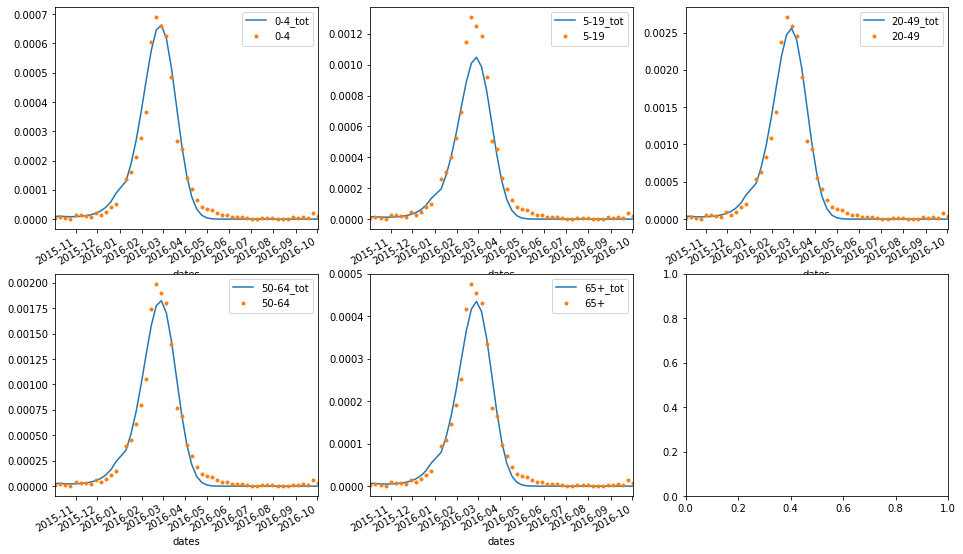

In [10]:
#fitting season 2016:
# Model Fitting
p0=(0.0027,0.001682,0.0024,0.0018,0.0825) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_16= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_16,ca_16,'California',2016)
                           ,options={'maxiter':2000})

fitted_params_16 = res_fit_16.x

# run the fitted model:
fitted_beta_16 = np.array([fitted_params_16[0],fitted_params_16[1],fitted_params_16[1],fitted_params_16[2],
                           fitted_params_16[3]])
fitted_phi_16 = fitted_params_16[4]
res_mdl_16 = model.run_model(fitted_beta_16,fitted_phi_16*10**(4),1e-4,1e-4,
                          population_size=model.population_size['California'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_16)
calibrate_mdl_16 = model.model_infected_symp_cases(res_mdl_16,dates_16,2016)
model.plot_calibrated_model(ca_16,calibrate_mdl_16)

### 2017

Current MSE:  5.392865745548643e-07
Current MSE:  5.392865745548643e-07
Current MSE:  5.392865716068147e-07
Current MSE:  5.392865315421896e-07
Current MSE:  5.392865655249048e-07
Current MSE:  5.392865732410119e-07
Current MSE:  5.392865755223983e-07
Current MSE:  5.392865633800632e-07
Current MSE:  5.392865633800632e-07
Current MSE:  5.392865604319533e-07
Current MSE:  5.392865203664963e-07
Current MSE:  5.392865543499205e-07
Current MSE:  5.392865620661844e-07
Current MSE:  5.392865643476144e-07
Current MSE:  0.0006058970785237794
Current MSE:  0.0006058970785237794
Current MSE:  0.0006058970953122739
Current MSE:  0.0006058973093944171
Current MSE:  0.0006058971388341207
Current MSE:  0.000605897087922403
Current MSE:  0.0006058844935542238
Current MSE:  0.0005592258992423924
Current MSE:  0.0005592258992423924
Current MSE:  0.0005592259276409155
Current MSE:  0.0005592263077968948
Current MSE:  0.00055922600435593
Current MSE:  0.0005592259146250415
Current MSE:  0.000559216895945

Current MSE:  5.302288173527208e-07
Current MSE:  5.302288409863502e-07
Current MSE:  5.301186741224414e-07
Current MSE:  5.301186741224414e-07
Current MSE:  5.301186970511985e-07
Current MSE:  5.301190384069874e-07
Current MSE:  5.301187677346079e-07
Current MSE:  5.301186871798159e-07
Current MSE:  5.301187075962602e-07
Current MSE:  5.301186712910916e-07
Current MSE:  5.301186712910916e-07
Current MSE:  5.301186942198284e-07
Current MSE:  5.301190355753152e-07
Current MSE:  5.301187649032114e-07
Current MSE:  5.301186843484587e-07
Current MSE:  5.301187047649106e-07
Current MSE:  5.301186741110869e-07
Current MSE:  5.301186741110869e-07
Current MSE:  5.301186970398436e-07
Current MSE:  5.301190383956241e-07
Current MSE:  5.301187677232512e-07
Current MSE:  5.301186871684612e-07
Current MSE:  5.301187075849057e-07
Current MSE:  5.286797501164794e-07
Current MSE:  5.286797501164794e-07
Current MSE:  5.286797770101745e-07
Current MSE:  5.286801725190034e-07
Current MSE:  5.286798883681

Current MSE:  5.039916609095832e-07
Current MSE:  5.03990787313346e-07
Current MSE:  5.039904679772628e-07
Current MSE:  5.039906468141447e-07
Current MSE:  5.039906468141447e-07
Current MSE:  5.039908839203438e-07
Current MSE:  5.03994596135308e-07
Current MSE:  5.039916626140078e-07
Current MSE:  5.039907890176316e-07
Current MSE:  5.039904696814542e-07
Current MSE:  4.882557222593385e-07
Current MSE:  4.882557222593385e-07
Current MSE:  4.882557492813983e-07
Current MSE:  4.882563227366833e-07
Current MSE:  4.882558485491488e-07
Current MSE:  4.882557367524432e-07
Current MSE:  4.882559821630741e-07
Current MSE:  4.6761432336913235e-07
Current MSE:  4.6761432336913235e-07
Current MSE:  4.676145625042564e-07
Current MSE:  4.6762006353481186e-07
Current MSE:  4.6761526649038664e-07
Current MSE:  4.6761443807176947e-07
Current MSE:  4.6761435818012894e-07
Current MSE:  4.7584717332829465e-07
Current MSE:  4.7584717332829465e-07
Current MSE:  4.7584719263987134e-07
Current MSE:  4.75847

Current MSE:  4.0851906157180113e-05
Current MSE:  4.085196705433893e-05
Current MSE:  4.085292684754807e-05
Current MSE:  4.085207716412548e-05
Current MSE:  4.085192678178158e-05
Current MSE:  4.0851895798054494e-05
Current MSE:  7.037480887872677e-06
Current MSE:  7.037480887872677e-06
Current MSE:  7.0375142584437426e-06
Current MSE:  7.038104863044164e-06
Current MSE:  7.0375701511029314e-06
Current MSE:  7.03749182430716e-06
Current MSE:  7.0374760335229435e-06
Current MSE:  5.573924062336703e-07
Current MSE:  5.573924062336703e-07
Current MSE:  5.573975610969392e-07
Current MSE:  5.574936387322131e-07
Current MSE:  5.574054727054403e-07
Current MSE:  5.573940488004376e-07
Current MSE:  5.573908147414207e-07
Current MSE:  1.9843804792635015e-07
Current MSE:  1.9843804792635015e-07
Current MSE:  1.9843788544585117e-07
Current MSE:  1.9843637654945032e-07
Current MSE:  1.9843722921112156e-07
Current MSE:  1.9843797898143573e-07
Current MSE:  1.9843815109240869e-07
Current MSE:  1.9

Current MSE:  6.174691392345106e-06
Current MSE:  6.174460228879309e-06
Current MSE:  6.1744139468741135e-06
Current MSE:  6.174395528246696e-06
Current MSE:  5.386686171160193e-07
Current MSE:  5.386686171160193e-07
Current MSE:  5.386796589877417e-07
Current MSE:  5.387728518670359e-07
Current MSE:  5.386908563222728e-07
Current MSE:  5.386727226458017e-07
Current MSE:  5.386673325624131e-07
Current MSE:  6.370382050321924e-08
Current MSE:  6.370382050321924e-08
Current MSE:  6.370506321921209e-08
Current MSE:  6.37201374256703e-08
Current MSE:  6.370744505566245e-08
Current MSE:  6.370433422421237e-08
Current MSE:  6.370361950468237e-08
Current MSE:  5.123018137136713e-08
Current MSE:  5.123018137136713e-08
Current MSE:  5.123033805336557e-08
Current MSE:  5.123346203297463e-08
Current MSE:  5.123092662504898e-08
Current MSE:  5.123023000617842e-08
Current MSE:  5.1230189982989974e-08
Current MSE:  5.2173772383600266e-08
Current MSE:  5.2173772383600266e-08
Current MSE:  5.217431021

Current MSE:  4.483974581236643e-08
Current MSE:  4.4839760355709884e-08
Current MSE:  4.4839760355709884e-08
Current MSE:  4.483975973204368e-08
Current MSE:  4.483977571144032e-08
Current MSE:  4.483976429543867e-08
Current MSE:  4.4839760852466835e-08
Current MSE:  4.483976035027183e-08
Current MSE:  4.483973843112581e-08
Current MSE:  4.483973843112581e-08
Current MSE:  4.483973720838776e-08
Current MSE:  4.483974574714926e-08
Current MSE:  4.483974040488463e-08
Current MSE:  4.483973855759822e-08
Current MSE:  4.483973866781119e-08
Current MSE:  4.4839737209217444e-08
Current MSE:  4.4839737209217444e-08
Current MSE:  4.4839735862194474e-08
Current MSE:  4.483974281004074e-08
Current MSE:  4.48397387998371e-08
Current MSE:  4.483973727556201e-08
Current MSE:  4.483973747518915e-08
Current MSE:  4.483973830568011e-08
Current MSE:  4.483973830568011e-08
Current MSE:  4.4839737083002474e-08
Current MSE:  4.4839745621731155e-08
Current MSE:  4.483974027937875e-08
Current MSE:  4.48397

Current MSE:  4.483829524164013e-08
Current MSE:  4.483832690231001e-08
Current MSE:  4.483830042562361e-08
Current MSE:  4.483829404682544e-08
Current MSE:  4.483829173325569e-08
Current MSE:  4.483821336522821e-08
Current MSE:  4.483821336522821e-08
Current MSE:  4.4838214585989215e-08
Current MSE:  4.4838232115252605e-08
Current MSE:  4.483821714629703e-08
Current MSE:  4.4838213965769694e-08
Current MSE:  4.4838212526417565e-08
Current MSE:  4.483819611595934e-08
Current MSE:  4.483819611595934e-08
Current MSE:  4.483819676981766e-08
Current MSE:  4.48382072379726e-08
Current MSE:  4.483819801936427e-08
Current MSE:  4.483819643677854e-08
Current MSE:  4.483819543423582e-08
Current MSE:  4.4838193114813714e-08
Current MSE:  4.4838193114813714e-08
Current MSE:  4.483819348530475e-08
Current MSE:  4.4838200424053756e-08
Current MSE:  4.483819407973977e-08
Current MSE:  4.4838193295826514e-08
Current MSE:  4.4838192511613666e-08
Current MSE:  4.483819414689162e-08
Current MSE:  4.4838

Current MSE:  4.4838191319995196e-08
Current MSE:  4.4838191288787055e-08
Current MSE:  4.483819139747646e-08
Current MSE:  4.4838191313798104e-08
Current MSE:  4.4838191313798104e-08
Current MSE:  4.4838191177227025e-08
Current MSE:  4.483819126645571e-08
Current MSE:  4.483819131999528e-08
Current MSE:  4.483819128878721e-08
Current MSE:  4.48381913974766e-08
Current MSE:  4.4838191313798025e-08
Current MSE:  4.4838191313798025e-08
Current MSE:  4.483819117722697e-08
Current MSE:  4.4838191266455646e-08
Current MSE:  4.483819131999525e-08
Current MSE:  4.4838191288787154e-08
Current MSE:  4.483819139747653e-08
Current MSE:  4.4838191313798e-08
Current MSE:  4.4838191313798e-08
Current MSE:  4.4838191177226886e-08
Current MSE:  4.483819126645559e-08
Current MSE:  4.483819131999521e-08
Current MSE:  4.483819128878715e-08
Current MSE:  4.483819139747648e-08
Current MSE:  4.483819131379796e-08
Current MSE:  4.483819131379796e-08
Current MSE:  4.4838191177226813e-08
Current MSE:  4.483819

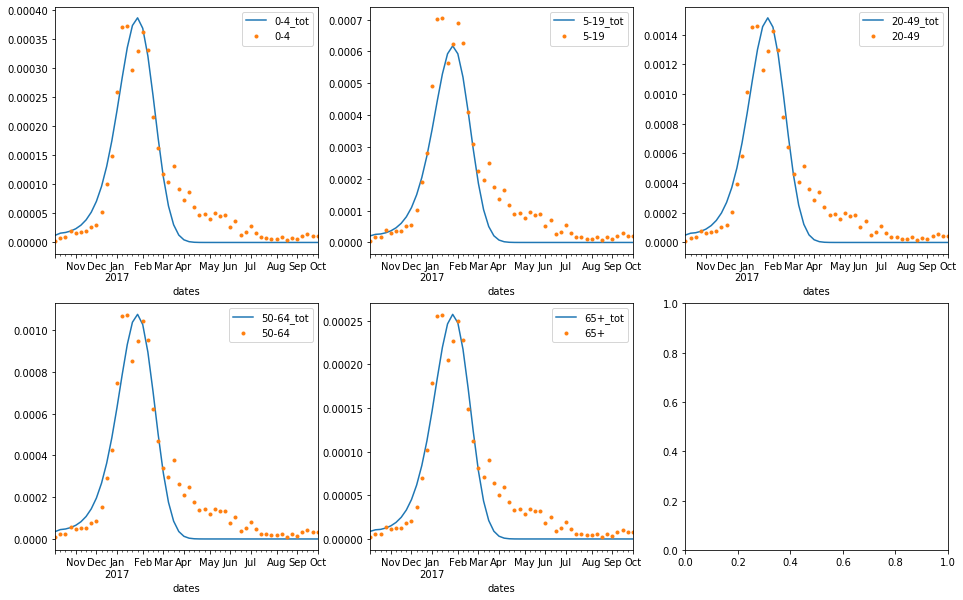

In [11]:
#fitting season 2017:
# Model Fitting
p0=(0.0024,0.001580,0.0023,0.0017,0.080) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.005,0.017))# boundries for variables
res_fit_17= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_17,ca_17,'California',2017)
                           ,options={'maxiter':1000})

fitted_params_17 = res_fit_17.x

# run the fitted model:
fitted_beta_17 = np.array([fitted_params_17[0],fitted_params_17[1],fitted_params_17[1],fitted_params_17[2],
                           fitted_params_17[3]])
fitted_phi_17 = fitted_params_17[4]
res_mdl_17 = model.run_model(fitted_beta_17,fitted_phi_17*10**(4),1e-4,1e-4,
                          population_size=model.population_size['California'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_17)
calibrate_mdl_17 = model.model_infected_symp_cases(res_mdl_17,dates_17,2017)
model.plot_calibrated_model(ca_17,calibrate_mdl_17)

### 2018

Current MSE:  4.568801168458434e-06
Current MSE:  4.568801168458434e-06
Current MSE:  4.568801160169537e-06
Current MSE:  4.568801044292243e-06
Current MSE:  4.568801144808283e-06
Current MSE:  4.568801164949377e-06
Current MSE:  4.568801179042365e-06
Current MSE:  4.568801157559381e-06
Current MSE:  4.568801157559381e-06
Current MSE:  4.568801149270464e-06
Current MSE:  4.568801033392871e-06
Current MSE:  4.568801133909169e-06
Current MSE:  4.568801154050315e-06
Current MSE:  4.568801168143377e-06
Current MSE:  0.0004431681004009673
Current MSE:  0.0004431681004009673
Current MSE:  0.00044316810412338686
Current MSE:  0.00044316795216389017
Current MSE:  0.00044316815057819436
Current MSE:  0.0004431681085098461
Current MSE:  0.0004431705792309814
Current MSE:  0.00044445500908600426
Current MSE:  0.00044445500908600426
Current MSE:  0.00044445499805321765
Current MSE:  0.0004444544452541811
Current MSE:  0.00044445502259099175
Current MSE:  0.0004444550167793111
Current MSE:  0.00044

Current MSE:  4.543123115837928e-06
Current MSE:  4.543122007226048e-06
Current MSE:  4.543121790337432e-06
Current MSE:  4.541266331623637e-06
Current MSE:  4.541266331623637e-06
Current MSE:  4.541266406684768e-06
Current MSE:  4.5412672751247764e-06
Current MSE:  4.541266982102302e-06
Current MSE:  4.541266454877321e-06
Current MSE:  4.5412665370355806e-06
Current MSE:  4.54138870711377e-06
Current MSE:  4.54138870711377e-06
Current MSE:  4.541388752028628e-06
Current MSE:  4.541389228363861e-06
Current MSE:  4.541389111611689e-06
Current MSE:  4.5413887836378615e-06
Current MSE:  4.541388957490117e-06
Current MSE:  4.541261389721021e-06
Current MSE:  4.541261389721021e-06
Current MSE:  4.541261448750599e-06
Current MSE:  4.54126210861217e-06
Current MSE:  4.541261909265199e-06
Current MSE:  4.541261488078847e-06
Current MSE:  4.541261620077477e-06
Current MSE:  4.541245920661409e-06
Current MSE:  4.541245920661409e-06
Current MSE:  4.541245987454907e-06
Current MSE:  4.541246748315

Current MSE:  2.7818966586943467e-06
Current MSE:  2.781898168488585e-06
Current MSE:  2.7819185679537266e-06
Current MSE:  2.7819119384060637e-06
Current MSE:  2.781899795406587e-06
Current MSE:  2.7819017710761963e-06
Current MSE:  1.3479928173388267e-06
Current MSE:  1.3479928173388267e-06
Current MSE:  1.3479960399080625e-06
Current MSE:  1.348089406764578e-06
Current MSE:  1.3480126899752219e-06
Current MSE:  1.3479960730567966e-06
Current MSE:  1.3479979857303377e-06
Current MSE:  1.5129486076096822e-06
Current MSE:  1.5129486076096822e-06
Current MSE:  1.5129481657711331e-06
Current MSE:  1.512943691871372e-06
Current MSE:  1.512950301272501e-06
Current MSE:  1.5129489232967953e-06
Current MSE:  1.512953239946289e-06
Current MSE:  1.2255905092939252e-06
Current MSE:  1.2255905092939252e-06
Current MSE:  1.2255906498609264e-06
Current MSE:  1.225605156533615e-06
Current MSE:  1.2255950314010138e-06
Current MSE:  1.2255913068372692e-06
Current MSE:  1.2255949676475148e-06
Current 

Current MSE:  8.219008400573623e-07
Current MSE:  8.219008531981376e-07
Current MSE:  8.219009065624211e-07
Current MSE:  8.219009056188018e-07
Current MSE:  8.219009056188018e-07
Current MSE:  8.219008890097942e-07
Current MSE:  8.219009814023051e-07
Current MSE:  8.219008400526521e-07
Current MSE:  8.219008531934159e-07
Current MSE:  8.219009065576984e-07
Current MSE:  8.219009056135148e-07
Current MSE:  8.219009056135148e-07
Current MSE:  8.219008890045033e-07
Current MSE:  8.219009813969625e-07
Current MSE:  8.219008400473532e-07
Current MSE:  8.219008531881271e-07
Current MSE:  8.219009065524058e-07
Current MSE:  8.218045158386921e-07
Current MSE:  8.218045158386921e-07
Current MSE:  8.21804574968852e-07
Current MSE:  8.218056342778913e-07
Current MSE:  8.218047011047877e-07
Current MSE:  8.218045124249152e-07
Current MSE:  8.218044659972394e-07
Current MSE:  8.218045158346996e-07
Current MSE:  8.218045158346996e-07
Current MSE:  8.218045749648579e-07
Current MSE:  8.2180563427387

Current MSE:  8.214380542862104e-07
Current MSE:  8.214381762673154e-07
Current MSE:  8.214382002953735e-07
Current MSE:  8.214381983660393e-07
Current MSE:  8.21438204530186e-07
Current MSE:  8.21438204530186e-07
Current MSE:  8.214381780308587e-07
Current MSE:  8.214380542861246e-07
Current MSE:  8.214381762672271e-07
Current MSE:  8.214382002952852e-07
Current MSE:  8.214381983659507e-07
Current MSE:  8.21436879071193e-07
Current MSE:  8.21436879071193e-07
Current MSE:  8.214368596702735e-07
Current MSE:  8.214368312935266e-07
Current MSE:  8.214368721585999e-07
Current MSE:  8.214368783203398e-07
Current MSE:  8.214368853697626e-07
Current MSE:  8.214368790711436e-07
Current MSE:  8.214368790711436e-07
Current MSE:  8.214368596702243e-07
Current MSE:  8.214368312934771e-07
Current MSE:  8.214368721585509e-07
Current MSE:  8.214368783202906e-07
Current MSE:  8.214368853697127e-07
Current MSE:  8.214353085338176e-07
Current MSE:  8.214353085338176e-07
Current MSE:  8.214352901313645e

Current MSE:  8.21412435868513e-07
Current MSE:  8.214124198002408e-07
Current MSE:  8.214124026914233e-07
Current MSE:  8.214124044203551e-07
Current MSE:  8.214124013376432e-07
Current MSE:  8.214124013376432e-07
Current MSE:  8.214123979773151e-07
Current MSE:  8.214124210013839e-07
Current MSE:  8.214124124784384e-07
Current MSE:  8.214123969492391e-07
Current MSE:  8.214123981439805e-07
Current MSE:  8.214124044837509e-07
Current MSE:  8.214124044837509e-07
Current MSE:  8.214124008281153e-07
Current MSE:  8.214124194267581e-07
Current MSE:  8.214124146762704e-07
Current MSE:  8.214123999368398e-07
Current MSE:  8.214124008644799e-07
Current MSE:  8.214124024224782e-07
Current MSE:  8.214124024224782e-07
Current MSE:  8.214123989144962e-07
Current MSE:  8.214124197258309e-07
Current MSE:  8.214124130891325e-07
Current MSE:  8.214123979548206e-07
Current MSE:  8.214123990160115e-07
Current MSE:  8.214124017580054e-07
Current MSE:  8.214124017580054e-07
Current MSE:  8.2141239832385

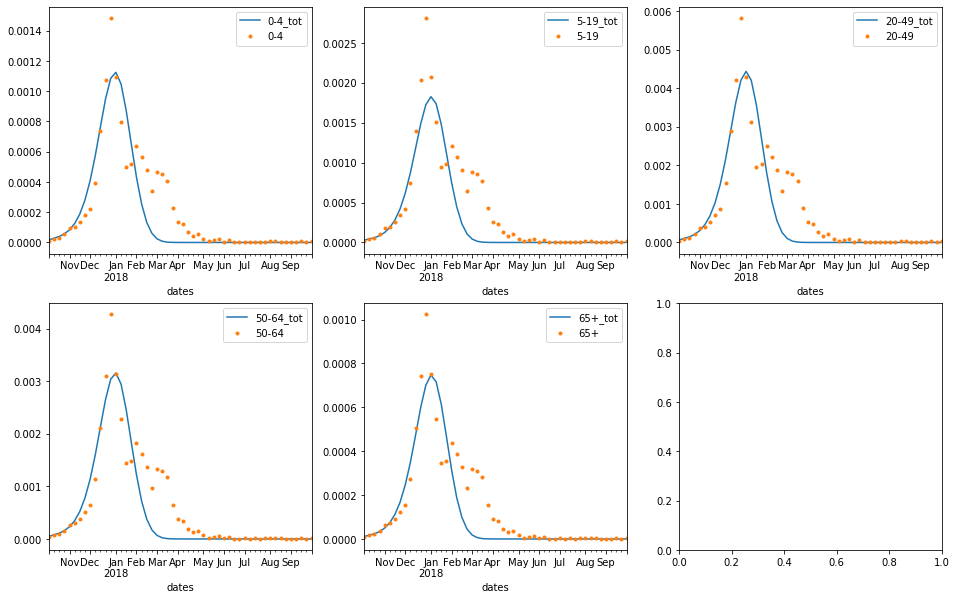

In [12]:
#fitting season 2018:
# Model Fitting
p0=(0.0023,0.0019,0.0017,0.00245,0.0775) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_18= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_18,ca_18,'California',2018)
                           ,options={'maxiter':1000})

fitted_params_18 = res_fit_18.x

# run the fitted model:
fitted_beta_18 = np.array([fitted_params_18[0],fitted_params_18[1],fitted_params_18[1],fitted_params_18[2],
                        fitted_params_18[3]])
fitted_phi_18 = fitted_params_18[4]
res_mdl_18 = model.run_model(fitted_beta_18,fitted_phi_18*10**(4),1e-4,1e-4,
                             population_size=model.population_size['California'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_18)
calibrate_mdl_18 = model.model_infected_symp_cases(res_mdl_18,dates_18,2018)
model.plot_calibrated_model(ca_18,calibrate_mdl_18)

### 2019

Current MSE:  1.0229794290383734e-06
Current MSE:  1.0229794290383734e-06
Current MSE:  1.0229794247431275e-06
Current MSE:  1.0229793721574225e-06
Current MSE:  1.022979416867528e-06
Current MSE:  1.022979427083705e-06
Current MSE:  1.0229794324675333e-06
Current MSE:  1.0229794187405002e-06
Current MSE:  1.0229794187405002e-06
Current MSE:  1.0229794144452038e-06
Current MSE:  1.0229793618588662e-06
Current MSE:  1.0229794065695124e-06
Current MSE:  1.0229794167858095e-06
Current MSE:  1.0229794221697004e-06
Current MSE:  0.0006445346946602304
Current MSE:  0.0006445346946602304
Current MSE:  0.0006445347119796176
Current MSE:  0.0006445348954140656
Current MSE:  0.0006445347581626379
Current MSE:  0.0006445347062761668
Current MSE:  0.0006445285147265534
Current MSE:  0.000453346285473409
Current MSE:  0.000453346285473409
Current MSE:  0.0004533462963621699
Current MSE:  0.00045334628305949005
Current MSE:  0.000453346349932408
Current MSE:  0.0004533462979803059
Current MSE:  0.00

Current MSE:  1.0098270412201676e-06
Current MSE:  1.0098273388318614e-06
Current MSE:  1.0098274410573244e-06
Current MSE:  1.0098275422182497e-06
Current MSE:  8.243040852963906e-06
Current MSE:  8.243040852963906e-06
Current MSE:  8.243043647559427e-06
Current MSE:  8.243137337983765e-06
Current MSE:  8.243096502828903e-06
Current MSE:  8.243052636321892e-06
Current MSE:  8.24303665203258e-06
Current MSE:  1.2321298851763602e-06
Current MSE:  1.2321298851763602e-06
Current MSE:  1.2321316173213396e-06
Current MSE:  1.2321746304326207e-06
Current MSE:  1.2321521825257335e-06
Current MSE:  1.2321335108938665e-06
Current MSE:  1.2321239131460813e-06
Current MSE:  9.933710760884046e-07
Current MSE:  9.933710760884046e-07
Current MSE:  9.93371036570062e-07
Current MSE:  9.933701775369198e-07
Current MSE:  9.933707710710403e-07
Current MSE:  9.933710255369155e-07
Current MSE:  9.93371351401355e-07
Current MSE:  9.782287568588244e-07
Current MSE:  9.782287568588244e-07
Current MSE:  9.7822

Current MSE:  7.645091822962407e-07
Current MSE:  7.644998124994118e-07
Current MSE:  7.644963551463388e-07
Current MSE:  7.644966283079133e-07
Current MSE:  4.0389585083934087e-07
Current MSE:  4.0389585083934087e-07
Current MSE:  4.038954652850352e-07
Current MSE:  4.0388811518827535e-07
Current MSE:  4.0389407955555247e-07
Current MSE:  4.0389555180783466e-07
Current MSE:  4.038979407419762e-07
Current MSE:  4.038958298326342e-07
Current MSE:  4.038958298326342e-07
Current MSE:  4.0389544427851497e-07
Current MSE:  4.038880941867272e-07
Current MSE:  4.0389405855012535e-07
Current MSE:  4.038955308012846e-07
Current MSE:  4.0389791973482854e-07
Current MSE:  4.03895847869707e-07
Current MSE:  4.03895847869707e-07
Current MSE:  4.0389546231539284e-07
Current MSE:  4.0388811221853083e-07
Current MSE:  4.0389407658588175e-07
Current MSE:  4.0389554883819634e-07
Current MSE:  4.0389793777233564e-07
Current MSE:  1.0096906093891272e-05
Current MSE:  1.0096906093891272e-05
Current MSE:  1

Current MSE:  2.923451782994286e-07
Current MSE:  2.923454452967231e-07
Current MSE:  2.923454452967231e-07
Current MSE:  2.923455925934612e-07
Current MSE:  2.9235064866397967e-07
Current MSE:  2.923461996631648e-07
Current MSE:  2.9234546596319145e-07
Current MSE:  2.9234517861384967e-07
Current MSE:  2.897356123517273e-07
Current MSE:  2.897356123517273e-07
Current MSE:  2.8973559769125545e-07
Current MSE:  2.8973752213367494e-07
Current MSE:  2.897357474758804e-07
Current MSE:  2.897355533643927e-07
Current MSE:  2.897357402470075e-07
Current MSE:  2.8973561232948805e-07
Current MSE:  2.8973561232948805e-07
Current MSE:  2.8973559766901517e-07
Current MSE:  2.89737522111409e-07
Current MSE:  2.8973574745363647e-07
Current MSE:  2.897355533421536e-07
Current MSE:  2.897357402247695e-07
Current MSE:  2.8973561222186886e-07
Current MSE:  2.8973561222186886e-07
Current MSE:  2.897355975614035e-07
Current MSE:  2.8973752200393247e-07
Current MSE:  2.897357473460471e-07
Current MSE:  2.8

Current MSE:  2.636327344743425e-07
Current MSE:  2.636327003777726e-07
Current MSE:  2.6363296613708355e-07
Current MSE:  2.636327104015995e-07
Current MSE:  2.636327064132984e-07
Current MSE:  2.6363269539461075e-07
Current MSE:  2.6340992956396397e-07
Current MSE:  2.6340992956396397e-07
Current MSE:  2.6340984387460214e-07
Current MSE:  2.634093677426507e-07
Current MSE:  2.6340972492737726e-07
Current MSE:  2.6340987894921575e-07
Current MSE:  2.634099755475018e-07
Current MSE:  2.6554120166044445e-07
Current MSE:  2.6554120166044445e-07
Current MSE:  2.6554086916737356e-07
Current MSE:  2.6553688456819045e-07
Current MSE:  2.655401407446843e-07
Current MSE:  2.655410403831104e-07
Current MSE:  2.6554167961129074e-07
Current MSE:  2.63796057495944e-07
Current MSE:  2.63796057495944e-07
Current MSE:  2.6379584591608846e-07
Current MSE:  2.6379357165349475e-07
Current MSE:  2.6379541452387485e-07
Current MSE:  2.637959510292408e-07
Current MSE:  2.637963184221745e-07
Current MSE:  2

Current MSE:  2.6156884044666234e-07
Current MSE:  2.615690264272223e-07
Current MSE:  2.615690462559162e-07
Current MSE:  2.615690825027246e-07
Current MSE:  2.6156905547300955e-07
Current MSE:  2.6156905547300955e-07
Current MSE:  2.6156903882391264e-07
Current MSE:  2.615688404456695e-07
Current MSE:  2.615690264262162e-07
Current MSE:  2.61569046254907e-07
Current MSE:  2.6156908250171353e-07
Current MSE:  2.6156905547395294e-07
Current MSE:  2.6156905547395294e-07
Current MSE:  2.6156903882485517e-07
Current MSE:  2.6156884044659786e-07
Current MSE:  2.615690264271564e-07
Current MSE:  2.6156904625584976e-07
Current MSE:  2.6156908250265824e-07
Current MSE:  2.6156112393432283e-07
Current MSE:  2.6156112393432283e-07
Current MSE:  2.615611210457902e-07
Current MSE:  2.615611237683431e-07
Current MSE:  2.615611414557126e-07
Current MSE:  2.615611217225215e-07
Current MSE:  2.6156113299829275e-07
Current MSE:  2.6156111878607934e-07
Current MSE:  2.6156111878607934e-07
Current MSE: 

Current MSE:  0.00036752490888862385
Current MSE:  0.00036752490888862385
Current MSE:  0.0003675249256986147
Current MSE:  0.0003675252459871077
Current MSE:  0.00036752502211029656
Current MSE:  0.0003675249410191776
Current MSE:  0.00036752472013618564
Current MSE:  0.0002198037482505006
Current MSE:  0.0002198037482505006
Current MSE:  0.00021980377675310563
Current MSE:  0.0002198043945295127
Current MSE:  0.00021980389179641885
Current MSE:  0.00021980378895908502
Current MSE:  0.00021980361081803997
Current MSE:  0.0001208662533495831
Current MSE:  0.0001208662533495831
Current MSE:  0.00012086628573367754
Current MSE:  0.00012086705543994698
Current MSE:  0.00012086639571412644
Current MSE:  0.00012086629363216862
Current MSE:  0.00012086624715227661
Current MSE:  5.8577786355034383e-05
Current MSE:  5.8577786355034383e-05
Current MSE:  5.857784690137419e-05
Current MSE:  5.8578947711934775e-05
Current MSE:  5.8577995009712724e-05
Current MSE:  5.857783123723204e-05
Current MSE

Current MSE:  2.615332631223885e-07
Current MSE:  2.615332555632744e-07
Current MSE:  2.61533251682781e-07
Current MSE:  2.615332521728427e-07
Current MSE:  2.615332545614202e-07
Current MSE:  2.615332545614202e-07
Current MSE:  2.615332520743614e-07
Current MSE:  2.615332631229795e-07
Current MSE:  2.6153325556331073e-07
Current MSE:  2.615332516826816e-07
Current MSE:  2.6153325217267617e-07
Current MSE:  2.615332545613579e-07
Current MSE:  2.615332545613579e-07
Current MSE:  2.615332520743248e-07
Current MSE:  2.61533263123275e-07
Current MSE:  2.615332555633288e-07
Current MSE:  2.6153325168263203e-07
Current MSE:  2.61533252172593e-07
Current MSE:  2.615332545613265e-07
Current MSE:  2.615332545613265e-07
Current MSE:  2.615332520743063e-07
Current MSE:  2.6153326312342283e-07
Current MSE:  2.6153325556333783e-07
Current MSE:  2.615332516826071e-07
Current MSE:  2.6153325217255134e-07
Current MSE:  2.61533254561311e-07
Current MSE:  2.61533254561311e-07
Current MSE:  2.61533252074

Current MSE:  2.6153325378096277e-07
Current MSE:  2.6153325378096277e-07
Current MSE:  2.615332508088942e-07
Current MSE:  2.615332555476317e-07
Current MSE:  2.6153325325721445e-07
Current MSE:  2.615332506638963e-07
Current MSE:  2.6153325178993517e-07
Current MSE:  2.615332537624769e-07
Current MSE:  2.615332537624769e-07
Current MSE:  2.615332507977572e-07
Current MSE:  2.615332556321036e-07
Current MSE:  2.6153325326184555e-07
Current MSE:  2.6153325064902176e-07
Current MSE:  2.6153325176542294e-07
Current MSE:  2.6153325375358365e-07
Current MSE:  2.6153325375358365e-07
Current MSE:  2.6153325079253863e-07
Current MSE:  2.6153325567468937e-07
Current MSE:  2.615332532645107e-07
Current MSE:  2.6153325064193427e-07
Current MSE:  2.615332517535166e-07
Current MSE:  2.6153325374922455e-07
Current MSE:  2.6153325374922455e-07
Current MSE:  2.615332507900168e-07
Current MSE:  2.6153325569606964e-07
Current MSE:  2.615332532659307e-07
Current MSE:  2.6153325063847774e-07
Current MSE:

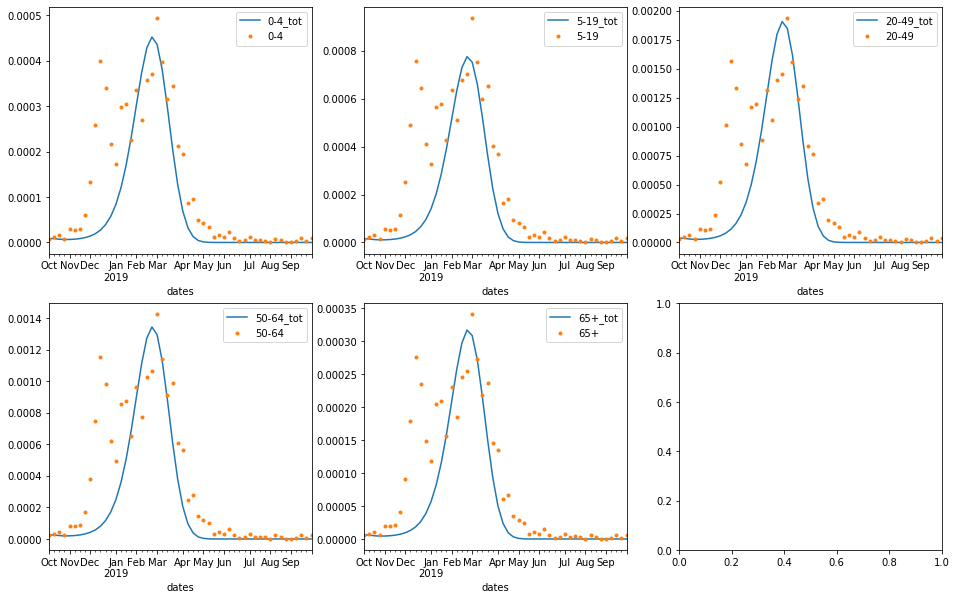

In [13]:
#fitting season 2019:
# Model Fitting
p0=(0.0029,0.001535,0.0023,0.0028,0.0815) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_19= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_19,ca_19,'California',2019)
                           ,options={'maxiter':1000})

fitted_params_19 = res_fit_19.x

# run the fitted model:
fitted_beta_19 = np.array([fitted_params_19[0],fitted_params_19[1],fitted_params_19[1],fitted_params_19[2],
                        fitted_params_19[3]])
fitted_phi_19 = fitted_params_19[4]
res_mdl_19 = model.run_model(fitted_beta_19,fitted_phi_19*10**(4),1e-4,1e-4,
                             population_size=model.population_size['California'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_19)
calibrate_mdl_19 = model.model_infected_symp_cases(res_mdl_19,dates_19,2019)
model.plot_calibrated_model(ca_19,calibrate_mdl_19)

# Saving calibration data

In [14]:
# Saving fitted parameters for TX
CA_fitted_params = {}
CA_fitted_params['2015'] = {'beta': fitted_beta_15, 'phi': fitted_phi_15}
CA_fitted_params['2016'] = {'beta': fitted_beta_16, 'phi': fitted_phi_16}
CA_fitted_params['2017'] = {'beta': fitted_beta_17, 'phi': fitted_phi_17}
CA_fitted_params['2018'] = {'beta': fitted_beta_18, 'phi': fitted_phi_18}
CA_fitted_params['2019'] = {'beta': fitted_beta_19, 'phi': fitted_phi_19}

with open('./model_data/CA_fitted_parameters.pickle', 'wb') as handle:
    pickle.dump(CA_fitted_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [15]:
# Getting the attack rate for each age group, model and data
df_model_AR_ca = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

mdl_AR_15 = model.model_attack_rate(calibrate_mdl_15,'California')
mdl_AR_15['season'] = 2015

mdl_AR_16 = model.model_attack_rate(calibrate_mdl_16,'California')
mdl_AR_16['season'] = 2016

mdl_AR_17 = model.model_attack_rate(calibrate_mdl_17,'California')
mdl_AR_17['season'] = 2017

mdl_AR_18 = model.model_attack_rate(calibrate_mdl_18,'California')
mdl_AR_18['season'] = 2018

mdl_AR_19 = model.model_attack_rate(calibrate_mdl_19,'California')
mdl_AR_19['season'] = 2019

for mdl_AR in [mdl_AR_15,mdl_AR_16,mdl_AR_17,mdl_AR_18,mdl_AR_19]:
    df_model_AR_ca = df_model_AR_ca.append(mdl_AR, ignore_index=True)

with open('./model_data/CA_model_attackrate.pickle', 'wb') as handle:
    pickle.dump(df_model_AR_ca, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
# Getting the attack rate for each age group, model and data
df_data_AR_ca = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

dt_AR_15 = model.get_data_attack_rate(ca_15,'California')
dt_AR_15['season'] = 2015

dt_AR_16 = model.get_data_attack_rate(ca_16,'California')
dt_AR_16['season'] = 2016

dt_AR_17 = model.get_data_attack_rate(ca_17,'California')
dt_AR_17['season'] = 2017

dt_AR_18 = model.get_data_attack_rate(ca_18,'California')
dt_AR_18['season'] = 2018

dt_AR_19 = model.get_data_attack_rate(ca_19,'California')
dt_AR_19['season'] = 2019

for dt_AR in [dt_AR_15,dt_AR_16,dt_AR_17,dt_AR_18,dt_AR_19]:
    df_data_AR_ca = df_data_AR_ca.append(dt_AR, ignore_index=True)

with open('./model_data/CA_data_attackrate.pickle', 'wb') as handle:
    pickle.dump(df_data_AR_ca, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
# Proportion Model
# Getting the attack rate for each age group, model and data
df_model_Pr_ca = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

mdl_Pr_15 = model.model_proportion(calibrate_mdl_15)
mdl_Pr_15['season'] = 2015

mdl_Pr_16 = model.model_proportion(calibrate_mdl_16)
mdl_Pr_16['season'] = 2016

mdl_Pr_17 = model.model_proportion(calibrate_mdl_17)
mdl_Pr_17['season'] = 2017

mdl_Pr_18 = model.model_proportion(calibrate_mdl_18)
mdl_Pr_18['season'] = 2018

mdl_Pr_19 = model.model_proportion(calibrate_mdl_19)
mdl_Pr_19['season'] = 2019

for mdl_Pr in [mdl_Pr_15,mdl_Pr_16,mdl_Pr_17,mdl_Pr_18,mdl_Pr_19]:
    df_model_Pr_ca = df_model_Pr_ca.append(mdl_Pr, ignore_index=True)

with open('./model_data/CA_model_proportion.pickle', 'wb') as handle:
    pickle.dump(df_model_Pr_ca, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
# Proportion Data

df_data_PR_ca = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

dt_Pr_15 = model.get_data_proportion(ca_15)
dt_Pr_15['season'] = 2015

dt_Pr_16 = model.get_data_proportion(ca_16)
dt_Pr_16['season'] = 2016

dt_Pr_17 = model.get_data_proportion(ca_17)
dt_Pr_17['season'] = 2017

dt_Pr_18 = model.get_data_proportion(ca_18)
dt_Pr_18['season'] = 2018

dt_Pr_19 = model.get_data_proportion(ca_19)
dt_Pr_19['season'] = 2019

for dt_Pr in [dt_Pr_15,dt_Pr_16,dt_Pr_17,dt_Pr_18,dt_Pr_19]:
    df_data_PR_ca = df_data_PR_ca.append(dt_Pr, ignore_index=True)

with open('./model_data/CA_data_proportion.pickle', 'wb') as handle:
    pickle.dump(df_data_PR_ca, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
# Getting data for fitting figure:
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_16)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_17)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_18)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_19)

with open('./model_data/CA_mdl_fitting_res.pickle', 'wb') as handle:
    pickle.dump(calibrate_mdl_15, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
# Getting data for fitting figure:
ca_15 = ca_15.append(ca_16)
ca_15 = ca_15.append(ca_17)
ca_15 = ca_15.append(ca_18)
ca_15 = ca_15.append(ca_19)

with open('./model_data/CA_data_fitting_res.pickle', 'wb') as handle:
    pickle.dump(ca_15, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
calibrate_mdl_15[calibrate_mdl_15.season == 2017]

,"(High, 0-4)","(High, 5-19)","(High, 20-49)","(High, 50-64)","(High, 65+)","(Low, 0-4)","(Low, 5-19)","(Low, 20-49)","(Low, 50-64)","(Low, 65+)",0-4_tot,5-19_tot,20-49_tot,50-64_tot,65+_tot,total,dates,season
2016-10-09,6.361769e-07,2.187645e-06,6.975501e-06,1.104633e-05,4.441517e-06,1.159799e-05,1.845051e-05,4.253197e-05,2.394281e-05,4.233320e-06,1.223417e-05,2.063816e-05,4.950747e-05,3.498915e-05,8.674837e-06,1.260438e-04,2016-10-09,2017
2016-10-16,8.121373e-07,2.621866e-06,8.518500e-06,1.377925e-05,5.238732e-06,1.480589e-05,2.211272e-05,5.194015e-05,2.986638e-05,4.993167e-06,1.561803e-05,2.473458e-05,6.045865e-05,4.364563e-05,1.023190e-05,1.546888e-04,2016-10-16,2017
2016-10-23,8.924642e-07,2.820044e-06,9.232855e-06,1.502148e-05,5.621123e-06,1.627031e-05,2.378414e-05,5.629581e-05,3.255891e-05,5.357633e-06,1.716277e-05,2.660419e-05,6.552867e-05,4.758040e-05,1.097876e-05,1.678548e-04,2016-10-23,2017
2016-10-30,1.028648e-06,3.234682e-06,1.060885e-05,1.726583e-05,6.445559e-06,1.875305e-05,2.728119e-05,6.468572e-05,3.742351e-05,6.143424e-06,1.978170e-05,3.051587e-05,7.529457e-05,5.468934e-05,1.258898e-05,1.928705e-04,2016-10-30,2017
2016-11-06,1.247662e-06,3.920654e-06,1.286124e-05,2.092401e-05,7.812123e-06,2.274585e-05,3.306665e-05,7.841930e-05,4.535258e-05,7.445930e-06,2.399351e-05,3.698730e-05,9.128054e-05,6.627659e-05,1.525805e-05,2.337960e-04,2016-11-06,2017
2016-11-13,1.579182e-06,4.963031e-06,1.627837e-05,2.647225e-05,9.887188e-06,2.878971e-05,4.185802e-05,9.925469e-05,5.737832e-05,9.423726e-06,3.036889e-05,4.682105e-05,1.155331e-04,8.385057e-05,1.931091e-05,2.958845e-04,2016-11-13,2017
2016-11-20,2.066233e-06,6.496378e-06,2.130307e-05,3.462724e-05,1.294006e-05,3.766901e-05,5.479021e-05,1.298920e-04,7.505418e-05,1.233349e-05,3.973524e-05,6.128658e-05,1.511951e-04,1.096814e-04,2.527355e-05,3.871718e-04,2016-11-20,2017
2016-11-27,2.767701e-06,8.707331e-06,2.854655e-05,4.637511e-05,1.734376e-05,5.045731e-05,7.343730e-05,1.740579e-04,1.005176e-04,1.653077e-05,5.322501e-05,8.214463e-05,2.026045e-04,1.468927e-04,3.387454e-05,5.187413e-04,2016-11-27,2017
2016-12-04,3.757901e-06,1.183325e-05,3.878471e-05,6.296276e-05,2.357357e-05,6.850942e-05,9.980115e-05,2.364834e-04,1.364711e-04,2.246855e-05,7.226732e-05,1.116344e-04,2.752681e-04,1.994339e-04,4.604212e-05,7.046459e-04,2016-12-04,2017
2016-12-11,5.119928e-06,1.614263e-05,5.289352e-05,8.578738e-05,3.216944e-05,9.334022e-05,1.361464e-04,3.225096e-04,1.859433e-04,3.066150e-05,9.846014e-05,1.522890e-04,3.754031e-04,2.717306e-04,6.283094e-05,9.607138e-04,2016-12-11,2017


MSE: 2.8237678038136925e-08


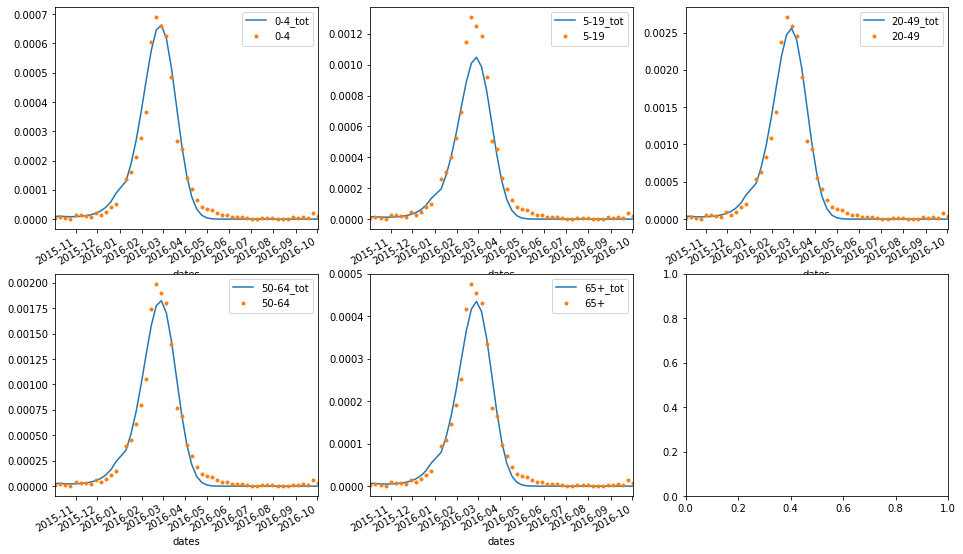

In [21]:
model.plot_calibrated_model(ca_16,calibrate_mdl_16)

In [22]:
dates_16[-2]

Timestamp('2016-10-02 00:00:00')